# **1-Import libraries**

In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
# Word processing libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/restaurant-reviews2/restaurant_reviews.csv


# **2 - Upload dataset**

In [3]:
#Download and Read the csv file
df = pd.read_csv('/kaggle/input/restaurant-reviews2/restaurant_reviews.csv')
df.head()

,Review,Sentiment
0,"Everything was perfect, highly recommended!",Positive
1,The dessert was absolutely delicious!,Positive
2,"Everything was perfect, highly recommended!",Positive
3,"Great experience, I will definitely come back.",Positive
4,"Great experience, I will definitely come back.",Positive


In [4]:
# Get the shape of the DataFrame
df.shape

(1500, 2)

In [5]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1500 non-null   object
 1   Sentiment  1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB


# **3 - Clean Data**

In [6]:
# Duplicate rows
df.duplicated().sum()

1490

In [7]:
# Drop duplicate rows
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [10]:
df['Review'].head(10)

0           Everything was perfect, highly recommended!
1                 The dessert was absolutely delicious!
3        Great experience, I will definitely come back.
5         Terrible service, I had to wait over an hour.
6     I loved the ambiance, and the staff were so fr...
10    The food was amazing and the service was excel...
14        The place was dirty, and the staff were rude.
18                     The food was cold and tasteless.
19    It was too expensive for the quality of food o...
35             A very disappointing experience overall.
Name: Review, dtype: object

In [11]:
def clean_text(text):
    
    # Convert to lowercase
    text = text.lower()
    # Remove commas
    text = re.sub(r',', '', text)
    # Remove single quotation marks
    text = re.sub(r'\'', '', text)
    # Remove double quotation marks
    text = re.sub(r'\"', '', text)
    # Remove opening parentheses 
    text = re.sub(r'\(', '', text)
    # Remove closing parentheses   
    text = re.sub(r'\)', '', text)
    # Remove newline characters
    text = re.sub(r'\n', '', text)
     # Remove left double quotation marks  
    text = re.sub(r'“', '', text)
    # Remove right double quotation marks
    text = re.sub(r'”', '', text)
    # Remove right single quotation marks
    text = re.sub(r'’', '', text)
    # Remove periods
    text = re.sub(r'\.', '', text)
    # Remove semicolons
    text = re.sub(r';', '', text)
    # Remove colons 
    text = re.sub(r':', '', text)
    # Remove hyphens 
    text = re.sub(r'\-', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Return the cleaned text
    return text

In [12]:
# Apply the clean_text function to the 'Review' column
df['cleaned_review'] = df['Review'].apply(clean_text)

In [13]:
df['cleaned_review']

0             everything was perfect highly recommended
1                  the dessert was absolutely delicious
3          great experience i will definitely come back
5           terrible service i had to wait over an hour
6     i loved the ambiance and the staff were so fri...
10    the food was amazing and the service was excel...
14          the place was dirty and the staff were rude
18                      the food was cold and tasteless
19    it was too expensive for the quality of food o...
35              a very disappointing experience overall
Name: cleaned_review, dtype: object

In [14]:
# Remove stop words
def Remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    text = ' '.join(words)
    return text

In [15]:
# Apply the Remove_stop_words function to the 'cleaned_review' column
df['cleaned_review'] = df['cleaned_review'].apply(Remove_stop_words)

In [16]:
df.head()

,Review,Sentiment,cleaned_review
0,"Everything was perfect, highly recommended!",Positive,everything perfect highly recommended
1,The dessert was absolutely delicious!,Positive,dessert absolutely delicious
3,"Great experience, I will definitely come back.",Positive,great experience definitely come back
5,"Terrible service, I had to wait over an hour.",Negative,terrible service wait hour
6,"I loved the ambiance, and the staff were so fr...",Positive,loved ambiance staff friendly


In [17]:
# Tokenize each cleaned_review into words
df['cleaned_review_tokens'] = df['cleaned_review'].apply(word_tokenize)

In [18]:
# the result of tokenizing
df['cleaned_review_tokens'].head()

0     [everything, perfect, highly, recommended]
1               [dessert, absolutely, delicious]
3    [great, experience, definitely, come, back]
5                [terrible, service, wait, hour]
6             [loved, ambiance, staff, friendly]
Name: cleaned_review_tokens, dtype: object

In [19]:
df['Sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [20]:
#define dictionay
Sentiment_dict = {'Negative': 0, 'Positive': 1}

# mapping the defined dictionary
df['sentiment_map'] = df['Sentiment'].map(Sentiment_dict)

In [21]:
df['sentiment_map'].unique()

array([1, 0])

In [22]:
df['sentiment_map'].value_counts()

sentiment_map
1    5
0    5
Name: count, dtype: int64

In [23]:
df.head()

,Review,Sentiment,cleaned_review,cleaned_review_tokens,sentiment_map
0,"Everything was perfect, highly recommended!",Positive,everything perfect highly recommended,"[everything, perfect, highly, recommended]",1
1,The dessert was absolutely delicious!,Positive,dessert absolutely delicious,"[dessert, absolutely, delicious]",1
3,"Great experience, I will definitely come back.",Positive,great experience definitely come back,"[great, experience, definitely, come, back]",1
5,"Terrible service, I had to wait over an hour.",Negative,terrible service wait hour,"[terrible, service, wait, hour]",0
6,"I loved the ambiance, and the staff were so fr...",Positive,loved ambiance staff friendly,"[loved, ambiance, staff, friendly]",1


# **4. Text analysis and data visualization**

In [25]:
# Count the most frequent words
from collections import Counter

positive_words = " ".join(df[df['Sentiment'] == "Positive"]['cleaned_review']).split()
negative_words = " ".join(df[df['Sentiment'] == "Negative"]['cleaned_review']).split()

print("Top Positive Words:", Counter(positive_words).most_common(5))
print("Top Negative Words:", Counter(negative_words).most_common(5))


Top Positive Words: [('everything', 1), ('perfect', 1), ('highly', 1), ('recommended', 1), ('dessert', 1)]
Top Negative Words: [('food', 2), ('terrible', 1), ('service', 1), ('wait', 1), ('hour', 1)]


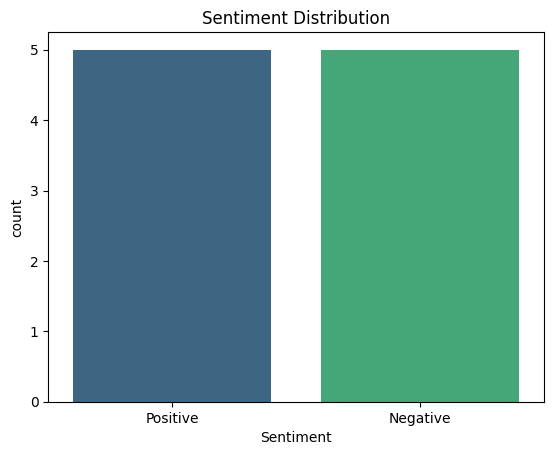

In [26]:
#Sentiment Distribution
sns.countplot(data=df, x="Sentiment", palette="viridis")
plt.title("Sentiment Distribution")
plt.show()


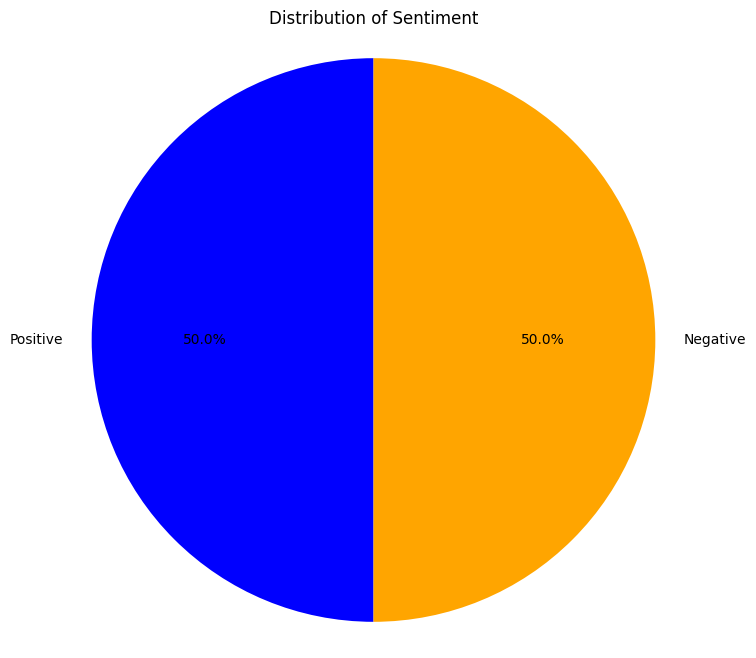

In [55]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(df['Sentiment'].value_counts(), labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Distribution of Sentiment')
plt.axis('equal') 
plt.show()

In [56]:
# Split the reviews into positive and negative categories
negative_reviews = df[df['sentiment_map'] == 0]['cleaned_review'].str.cat()
positive_reviews = df[df['sentiment_map'] == 1]['cleaned_review'].str.cat()

(-0.5, 799.5, 399.5, -0.5)

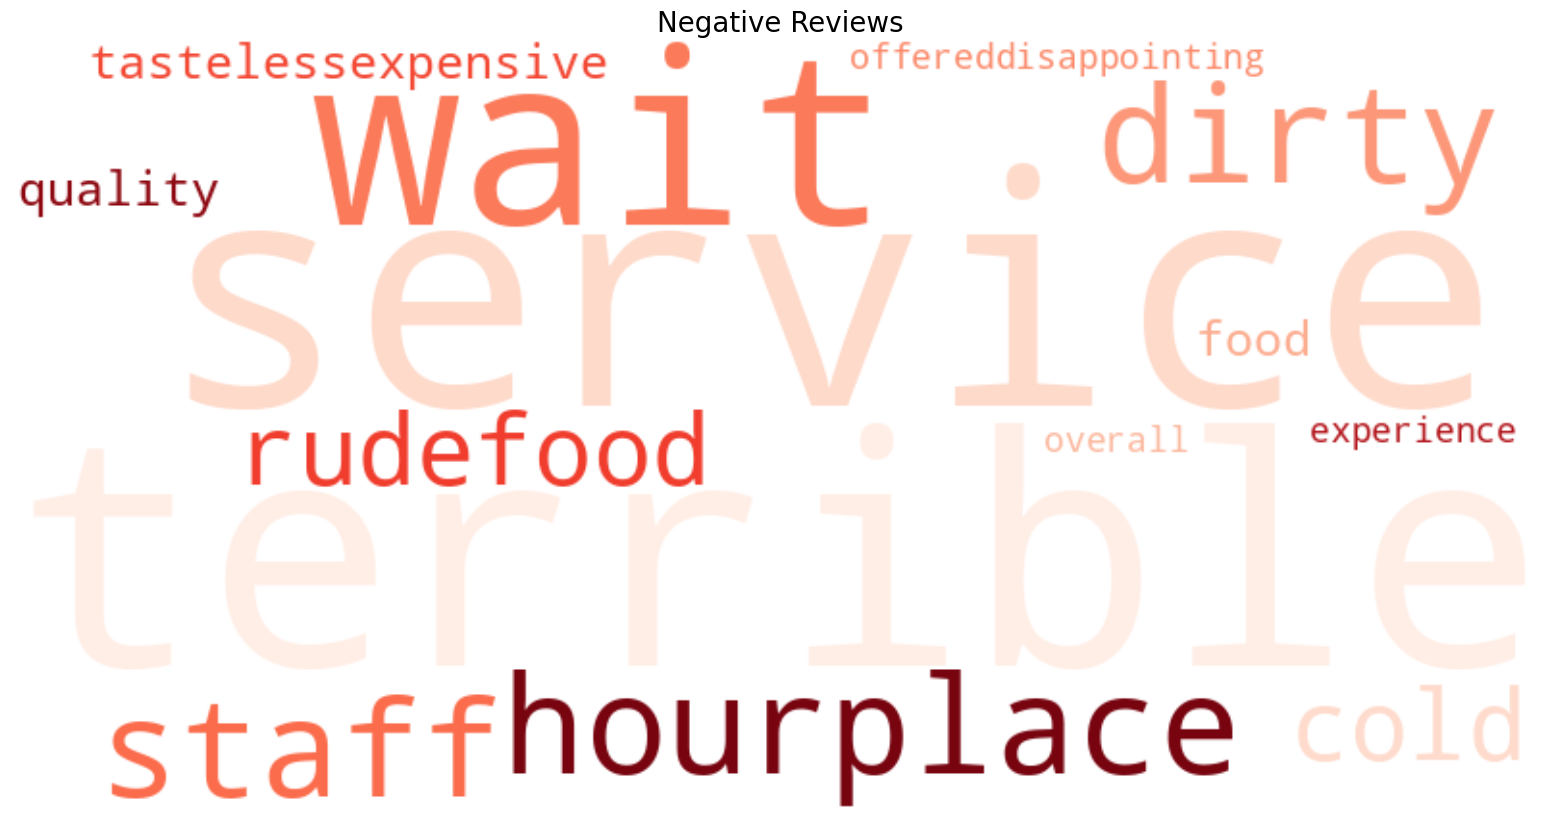

In [58]:
from wordcloud import WordCloud
plt.figure(figsize=(20, 10))

# Generate word clouds
negative_wordcloud = WordCloud(width=800, height=400, background_color='White', colormap='Reds').generate(negative_reviews)

#setting plot
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews', fontsize=20)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

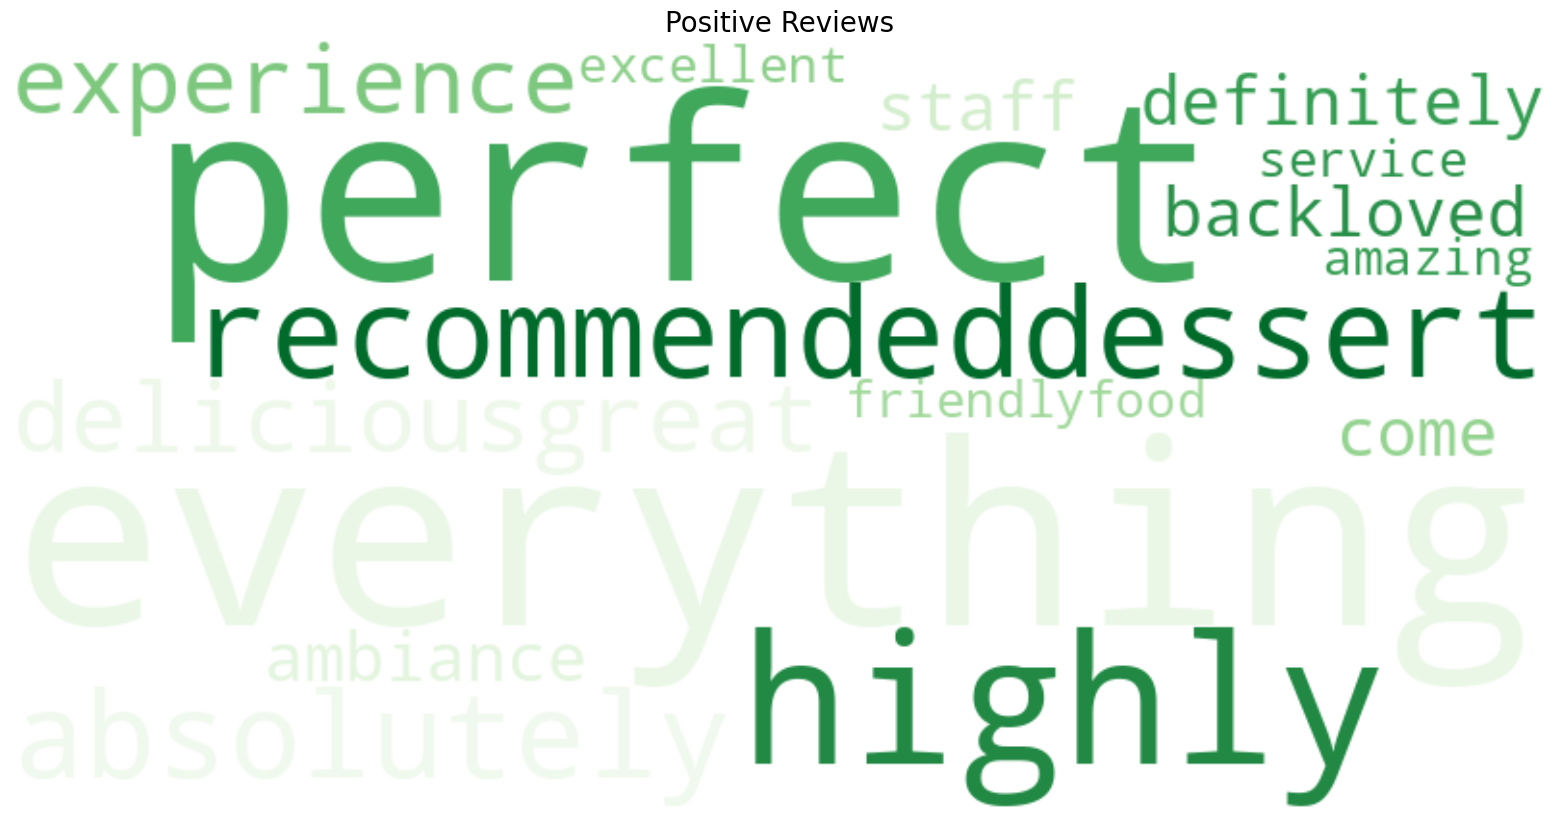

In [59]:
plt.figure(figsize=(20, 10))

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400,background_color='White', colormap='Greens').generate(positive_reviews)

#setting plot
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews', fontsize=20)
plt.axis('off')

# **5. Building a Sentiment Analysis Model**

In [28]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], df['Sentiment'], test_size=0.2, random_state=42
)

In [29]:
# Convert texts to vectors
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [30]:
# Training a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [31]:
# Evaluation
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         1
    Positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **6. Model testing**

In [52]:
#  Test on new review

# Single review input
new_review = "not Good"

# Tokenize the review
new_review_cleaned = [" ".join(word_tokenize(new_review))]  # Join tokens back into a string

# Transform the review into the vectorized form
new_review_vec = vectorizer.transform(new_review_cleaned)

print(new_review_vec)


In [53]:
# anticipate sentiment
prediction = model.predict(new_review_vec)
print(f"Review: {new_review[0]} -> Sentiment: {prediction[0]}")

Review: n -> Sentiment: Negative
